<a href="https://colab.research.google.com/github/DM2003/CODSOFT/blob/main/IRIS_CLASSIFICATION_DEBANGAN_MUKHERJEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Debangan Mukherjee

In [78]:
# Task 3
# CODSOFT, India
# Data Science internship
# Iris Flower Classification

In [ ]:
# Work pattern to be followed: Importing libraries and datasets ---> Data Preprocessing ----> Data Analysis ----> Train,test split ----> ML model ----> Model Evaluation

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
sns.set(style = 'white', color_codes = True)

In [2]:
#Loading the dataset
iris = pd.read_csv('/content/IRIS_DATA_CODSOFT.zip')

In [4]:
#First 5 rows of dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Last 5 rows of dataset
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# No of rows and columns in dataset
iris.shape

(150, 5)

In [7]:
# Some more information about our dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Checking for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Some statistical measures about our dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Checking if it's imbalanced or not
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Visualizing the data with Scatterplots

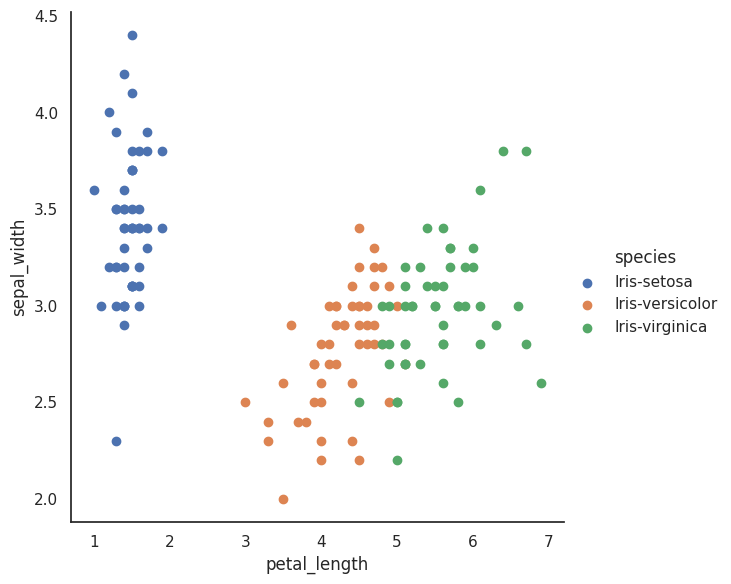

In [13]:
sns.FacetGrid(iris, hue = 'species', height = 6).map(plt.scatter, 'petal_length', 'sepal_width').add_legend()

<Axes: xlabel='sepal_length', ylabel='petal_length'>

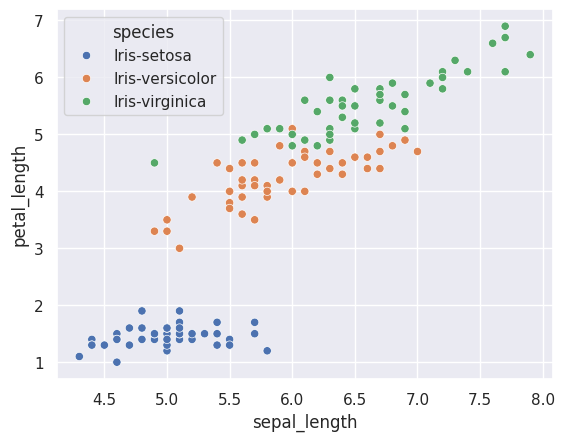

In [14]:
sns.set_theme()
sns.scatterplot(data = iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

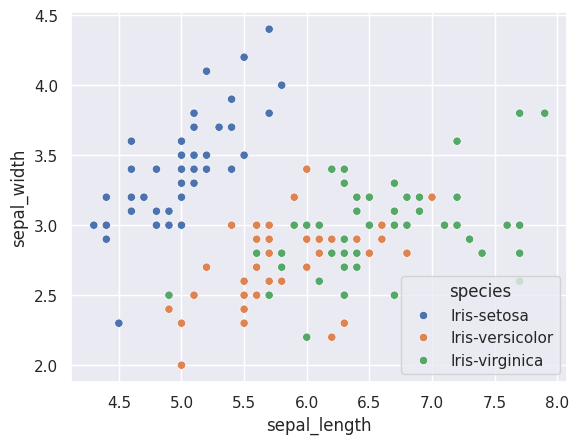

In [15]:
sns.set_theme()
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

In [40]:
# Modifying our categorical columns
iris.replace({'species':{'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica': 2}}, inplace = True)

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [42]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,2


In [61]:
# Separating features and target variables
X = iris.drop(columns =['species', 'target'],axis= 1)
Y = iris['species']

In [62]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [63]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [64]:
# Performing train-test split on our data where 20 percentage will be given to testing and 80 percentage for training the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [66]:
# We will use Logistic Regression for this classification Problem
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
X_train_prediction = model.predict(X_train)  # X_train_prediction is the prediction of our model and we have to use model.predict() function on X_train for that

In [70]:
print(X_train_prediction)

[0 0 2 1 0 0 2 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 2 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 2 2 0 0 2 1]


In [71]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) # Y_train is the set of real answers (that we already know) to our predictions made.
print("Accuracy score:", training_data_accuracy)

Accuracy score: 0.9666666666666667


  Thus, our model is 96 percent correct on training data

In [72]:
X_test_prediction = model.predict(X_test)

In [73]:
print(X_test_prediction)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]


In [74]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [76]:
print("Testing data accuracy:", testing_data_accuracy)

Testing data accuracy: 1.0


In [77]:
# Building a predictive system
input_data = (6.1, 2.9, 4.7, 1.4)
input_data_to_np_array = np.asarray(input_data)

input_data_reshaped = input_data_to_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

print(prediction)



if(prediction[0] == 0):
  print("Flower species is Iris-setosa")
elif (prediction[0] == 1):
  print("Flower species is Iris-versicolor")
else:
  print("Flower species is Iris-virginica")

[1]
Flower species is Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Thus, it's a correct prediction made by our model.